In [62]:
#code for download data 
import os
import tarfile #extract .tgz file
from six.moves import urllib
import numpy as np
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
     '''
    fetch housing data as .tgz file and extract it to .csv format
    
     '''
     if not os.path.isdir(housing_path):
         os.makedirs(housing_path)
     tgz_path = os.path.join(housing_path, "housing.tgz")
     urllib.request.urlretrieve(housing_url, tgz_path)
     housing_tgz = tarfile.open(tgz_path)
     housing_tgz.extractall(path=housing_path)
     housing_tgz.close()


In [63]:
fetch_housing_data()

In [64]:
import pandas as pd
def load_housing_data(path=HOUSING_PATH):
    '''load data and return dataframe'''
    csv_path = os.path.join(path,'housing.csv')
    print(csv_path)
    return pd.read_csv(csv_path)

#load data
data = load_housing_data()

datasets\housing\housing.csv


In [88]:
print(data.info())
# print(data.head())
# print("missing values are ",data['total_bedrooms'].isnull().sum())
# print(data['ocean_proximity'].value_counts())
(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  16512 non-null  float64
 1   latitude                   16512 non-null  float64
 2   housing_median_age         16512 non-null  float64
 3   total_rooms                16512 non-null  float64
 4   total_bedrooms             16354 non-null  float64
 5   population                 16512 non-null  float64
 6   households                 16512 non-null  float64
 7   median_income              16512 non-null  float64
 8   median_house_value         16512 non-null  float64
 9   ocean_proximity            16512 non-null  object 
 10  bedrooms_per_rooms         16354 non-null  float64
 11  rooms_per_households       16512 non-null  float64
 12  population_per_households  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_rooms,rooms_per_households,population_per_households
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,0.212878,5.440341,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,0.057379,2.611712,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.100000,1.130435,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,0.175304,4.442040,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,0.203031,5.232284,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,0.239831,6.056361,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,1.000000,141.909091,1243.333333


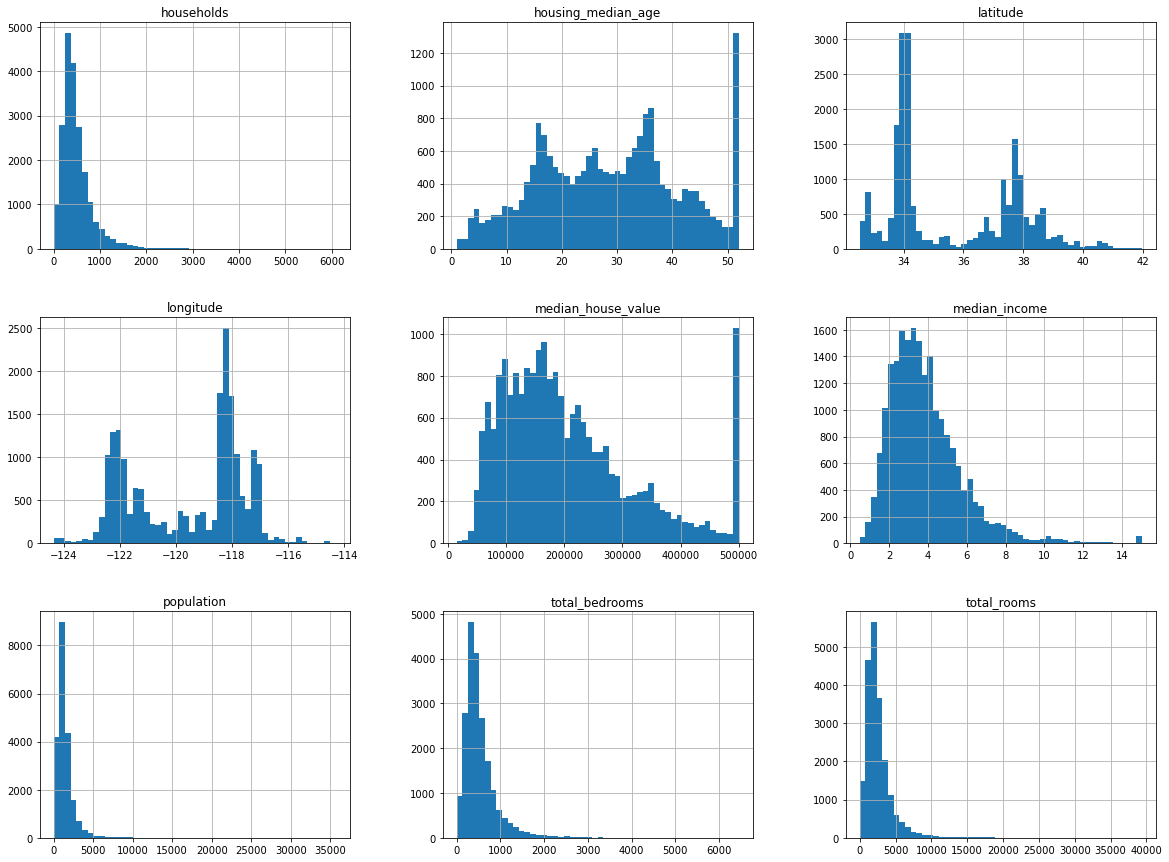

In [66]:
#graph
import matplotlib.pyplot as plt
%matplotlib inline
data.hist(bins=50,figsize=(20,15))
plt.show()
#tail heavy data 
# some data is capped

## Creating Test set

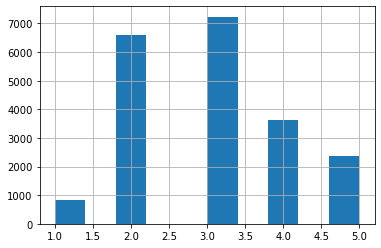

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit
#median_income data is imp. attribute
# data['median_income'].hist(bins=50)
#countinuos values to categorical intervals
data['income_cat']=pd.cut(data['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
#pd.cut is use to convert continuous data into some interval 
#like 9.0 - 10.0 CG people are BEST | 8.0 to 9.0 are Good | .....
data['income_cat'].hist()

In [68]:
st_split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

#Generate indices to split data into training and test set.
for i,j in  st_split.split(data,data['income_cat']): #split Stratified
    strat_train_set  =  data.loc[i]
    strat_test_set  =  data.loc[j]
    
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set) - strat_train_set['income_cat'].value_counts()/len(strat_train_set))

3   -0.000061
2   -0.000061
4    0.000061
5    0.000182
1   -0.000121
Name: income_cat, dtype: float64


We can see that data is stratified w.r.t median_income

In [69]:
strat_train_set.drop(labels='income_cat',inplace=True,axis=1)

In [70]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


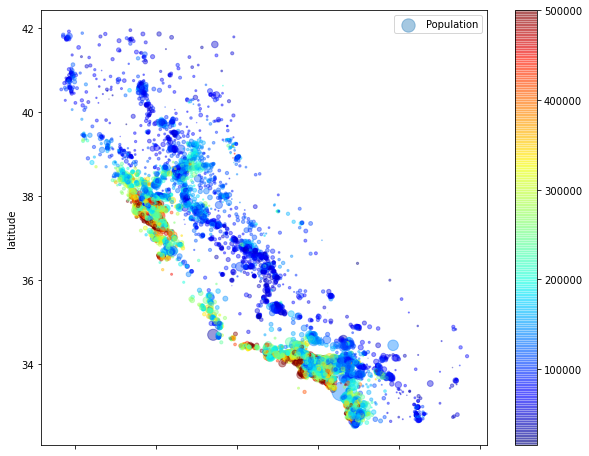

In [74]:
data = strat_train_set.copy()

data.plot(kind='scatter',x='longitude',y='latitude',alpha=.4,
         s=data['population']/100,label='Population',
          c=data['median_house_value'],cmap=plt.get_cmap('jet'),colorbar=True,
          figsize=(10,8)
         )


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000296B9A1C0D0>,
      dtype=object)

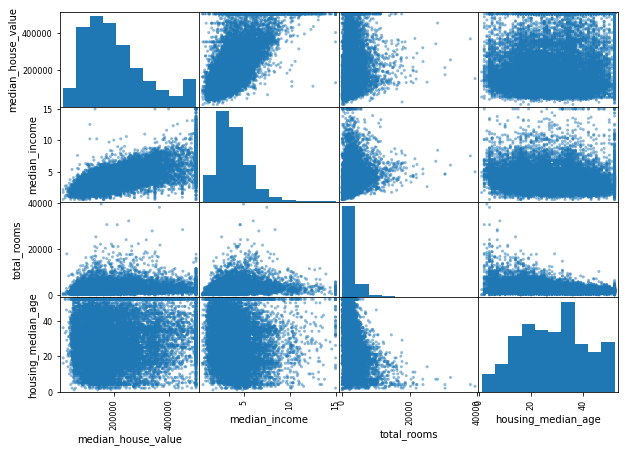

In [81]:
#corr_metrix
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False) #corr-with prediction

#median_income has more linear correlation with y    
from pandas.plotting import scatter_matrix
features = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(data[features],figsize=(10,7))

#found that income has strong correlation

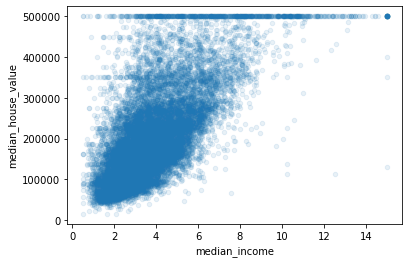

In [83]:
data.plot(kind='scatter',x='median_income',y='median_house_value',alpha=.1)

In [84]:
corr_matrix['median_house_value'].sort_values(ascending=False) #corr-with prediction

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [86]:
#after thinking about low correlational features
# total_rooms  | households | total_bedrooms | population
# new features could be 

# total_bedrooms / total_rooms
data['bedrooms_per_rooms'] = data['total_bedrooms']/data['total_rooms']
# total_rooms / households
data['rooms_per_households'] = data['total_rooms'] / data['households']
# population / households
data['population_per_households']  = data['population']/data['households']

In [87]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False) #corr-with prediction

median_house_value           1.000000
median_income                0.687160
rooms_per_households         0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_rooms          -0.259984
Name: median_house_value, dtype: float64